In [92]:
# Importing the Packages 

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from keplergl import KeplerGl

In [93]:
# Reading the merged geojson file into a geodataframe. 

pedon_sample_location_df = gpd.read_file('processed_data\pedon_sample_location.geojson', driver='GeoJSON')
pedon_sample_location_df.head(5)

rcasiteid         samp     upedon  TOP  BOT  Bulkdensity  SOC_pred1 Texture  \
0  C0107F02  C0107F021-1  C0107F021    0    5     0.953805  55.580000      PM   
1  C0107F02  C0107F021-2  C0107F021    5   11     1.200590  37.946338     sil   
2  C0107F02  C0107F021-3  C0107F021   11   25     1.111808   6.512871    sicl   
3  C0107F02  C0107F021-4  C0107F021   25   40     1.178822   5.701971       l   
4  C0107F02  C0107F021-5  C0107F021   40   50     1.236786   1.482753       l   

   fragvolc  c_tot_ncs  n_tot_ncs  s_tot_ncs     caco3   SOCstock5  \
0       0.0  53.527267   2.242210   0.185752       NaN  184.885955   
1       0.0  51.575090   1.729820   0.211545       NaN  184.885955   
2       5.0   3.445784   0.305839   0.021409       NaN  184.885955   
3      10.0   3.332542   0.205712   0.024685  0.051788  184.885955   
4       5.0   1.079146   0.142529   0.010181       NaN  184.885955   

   SOCstock30  SOCstock100    Land_Use     lon    lat  \
0  627.905363          NaN  Forestland -124.65  48.27   
1  627.905363          NaN  Forestland -124.65  48.27   
2  627.905363          NaN  Forestland -124.65  48.27   
3  627.905363          NaN  Forestland -124.65  48.27   
4  627.905363          NaN  Forestland -124.65  48.27   

                      geometry  
0  POINT (-124.65000 48.27000)  
1  POINT (-124.65000 48.27000)  
2  POINT (-124.65000 48.27000)  
3  POINT (-124.65000 48.27000)  
4  POINT (-124.65000 48.27000)

In [94]:
# Finding the Numbers of NA values in each column

pedon_sample_location_df.isna().sum()

rcasiteid         0
samp              0
upedon            0
TOP               0
BOT               0
Bulkdensity       1
SOC_pred1         0
Texture           0
fragvolc          0
c_tot_ncs       688
n_tot_ncs       688
s_tot_ncs       688
caco3          3587
SOCstock5        15
SOCstock30       87
SOCstock100     532
Land_Use          0
lon               0
lat               0
geometry          0
dtype: int64

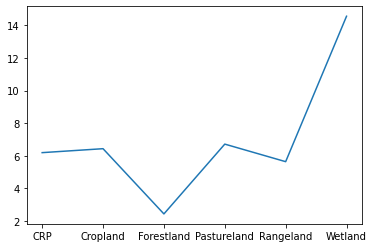

In [95]:
# Checking if the mean of caco3 varies for each LandUse

plt.plot(pedon_sample_location_df.groupby('Land_Use')['caco3'].mean())

In [96]:
"""
Since the means are different for each LandUse, we cannot just straight away apply the mean to all missing values. 
I have grouped the dataframe by each LandUse and using the mean of each LandUse (GroupedSeries), I have applied on the missing values of the respective columns
"""
missing_values_list = ['c_tot_ncs', 'n_tot_ncs', 's_tot_ncs', 'caco3','SOCstock5', 'SOCstock30', 'SOCstock100']
for each_missing_column in missing_values_list:
    pedon_sample_location_df[each_missing_column] = pedon_sample_location_df.groupby(['Land_Use'], sort=False)[each_missing_column].apply(lambda x: x.fillna(x.mean()))

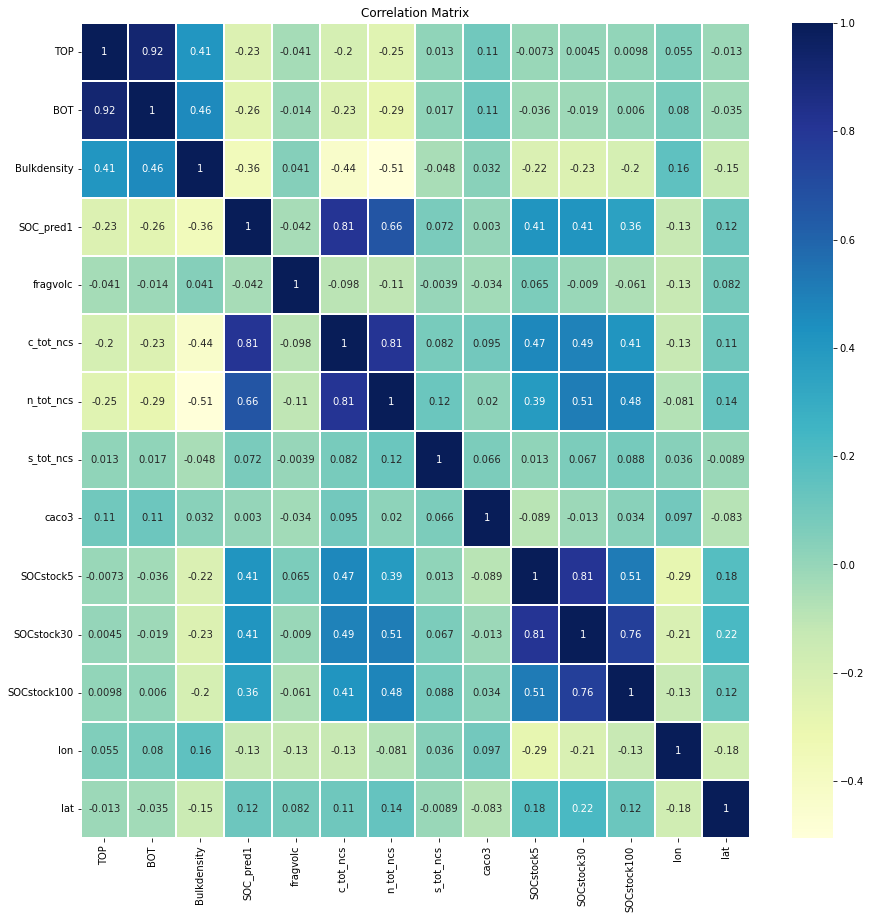

In [98]:
# I have plotted the correlation matrix of all columns

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(pedon_sample_location_df.corr(), annot=True, linewidths = 0.1, cmap="YlGnBu", ax=ax)
plt.title('Correlation Matrix')
plt.savefig(r'output\images\5_correlation_matrix.png')

In [99]:
# Creating new list to store the mean of each Land_Use for each soc respectively to stack plot. 

land_use=[]
soc5=[]
soc30=[]
soc100=[]
land_use_grouped = pedon_sample_location_df.groupby(['Land_Use'])
for key, groups in land_use_grouped : 
    land_use.append(key)
    soc5.append(groups['SOCstock5'].mean())
    soc30.append(groups['SOCstock30'].mean())
    soc100.append(groups['SOCstock100'].mean())  

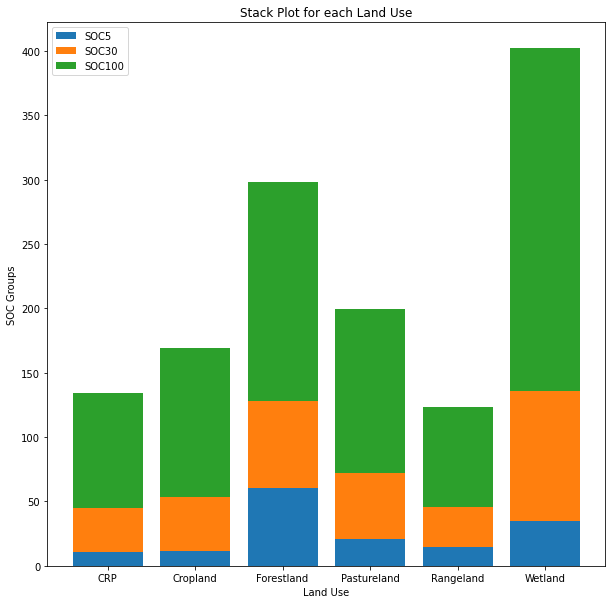

<Figure size 432x288 with 0 Axes>

In [101]:
# Stack Plotting the SOC values for each Land Use.

fig, ax = plt.subplots(figsize=(10,10))

plt.bar(land_use, soc5,label='SOC5')
plt.bar(land_use, soc30,label='SOC30', bottom=soc5)
plt.bar(land_use, soc100,label='SOC100', bottom=soc30)
plt.xlabel('Land Use')
plt.ylabel('SOC Groups')
plt.legend()
plt.title('Stack Plot for each Land Use')
plt.show()
plt.savefig(r'output\images\5_stackplot_soc_landuse.png')

**Categorical Columns** are columns which are having values which are categorized or are discrete like : `texture` and `Land_Use` in our data set. To train a Machine Learning model we have to encode the categorical columns, to convert them into numbers, depending on ordinal/nonordinal data we can use label or OneHotEncoding (And many others)

VS 


**Numerical columns** are columns which are having continuous values like `caco3`, `socstock5` columns in our dataset. These data needs to be feature-scaled (Standardized or Normalized) so the computer would not put more weightage on the features which have higher values in numbers. 


In [83]:
# Storing the final processed merged data fill with mean values in ESRIShape File, GeoJSON and CSV format. 

pedon_sample_location_df.to_file(r'output\esrishape\pedon_sample_location.shp')
pedon_sample_location_df.to_file(r'output\geojson\pedon_sample_location.geojson', driver='GeoJSON')
pedon_sample_location_df.to_csv(r'output\csv\pedon_sample_location.csv', index=None)

C:\TheFourthReich\anaconda3\envs\gisenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [81]:
# Storing the HTML format for Kepler Package 

pedon_sample_map = KeplerGl(height=600, width=600)
pedon_sample_map.add_data(data=pedon_sample_location_df,name='Area of Interest')
pedon_sample_map.save_to_html(file_name=r'output\html\pedon_sample_location.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to output\html\pedon_sample_location.html!


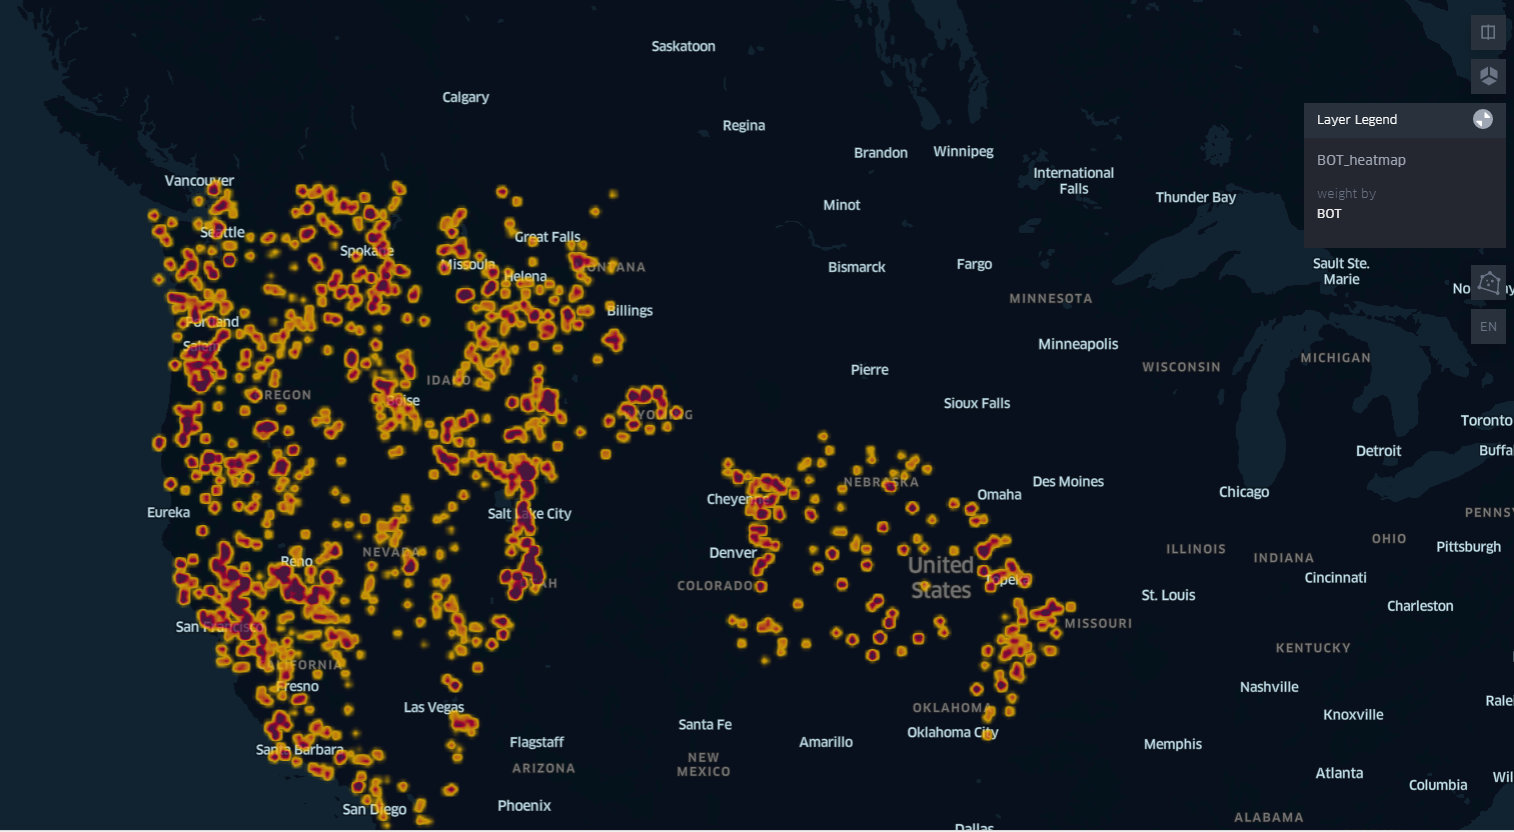

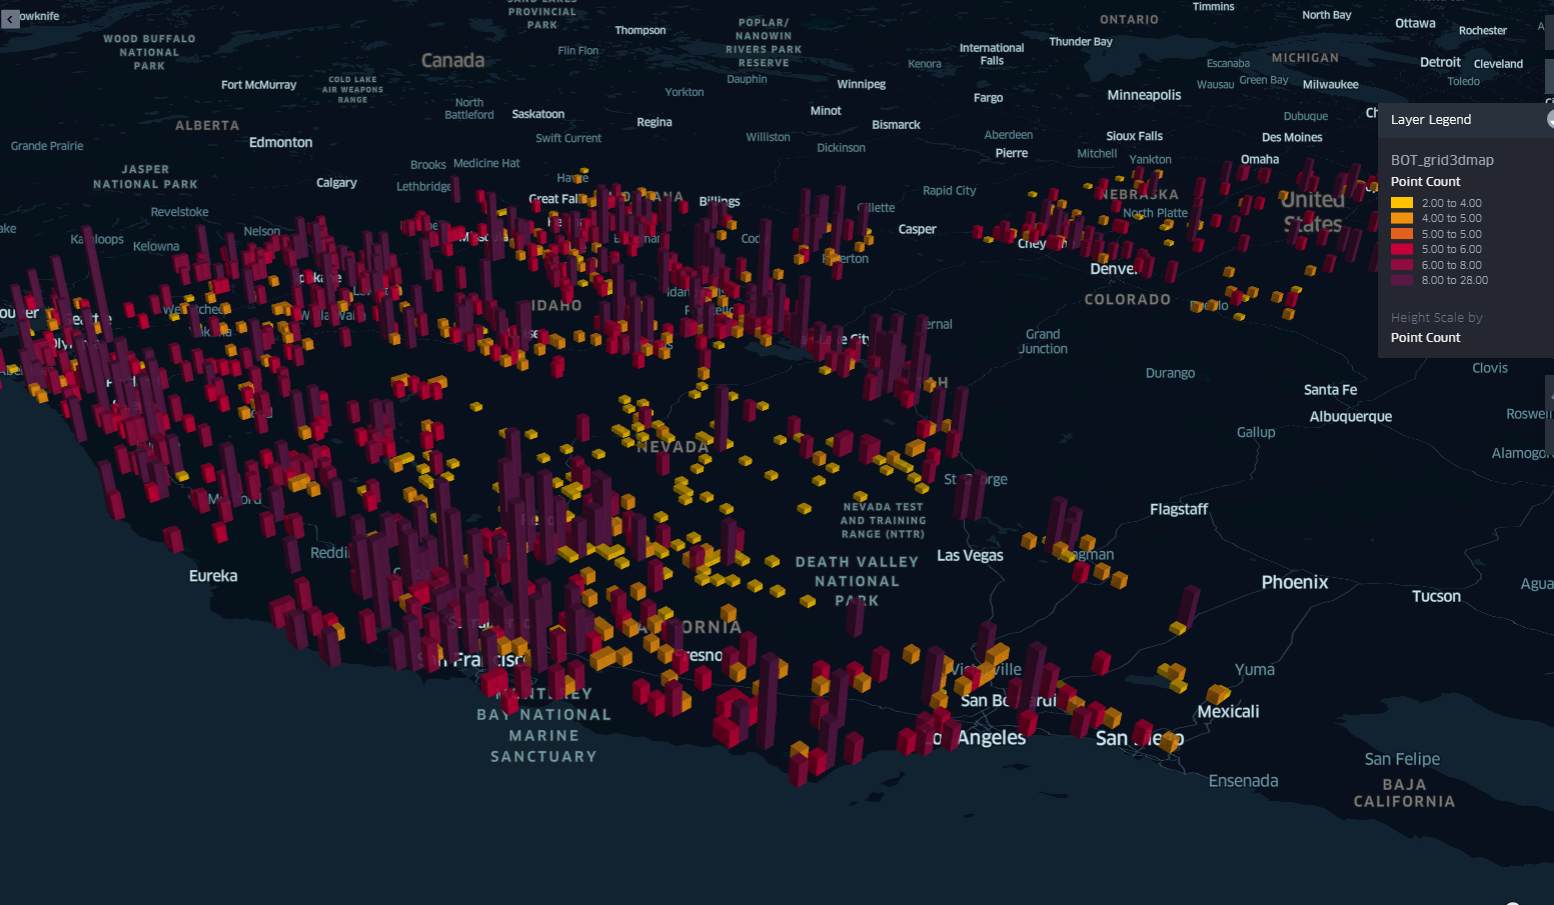

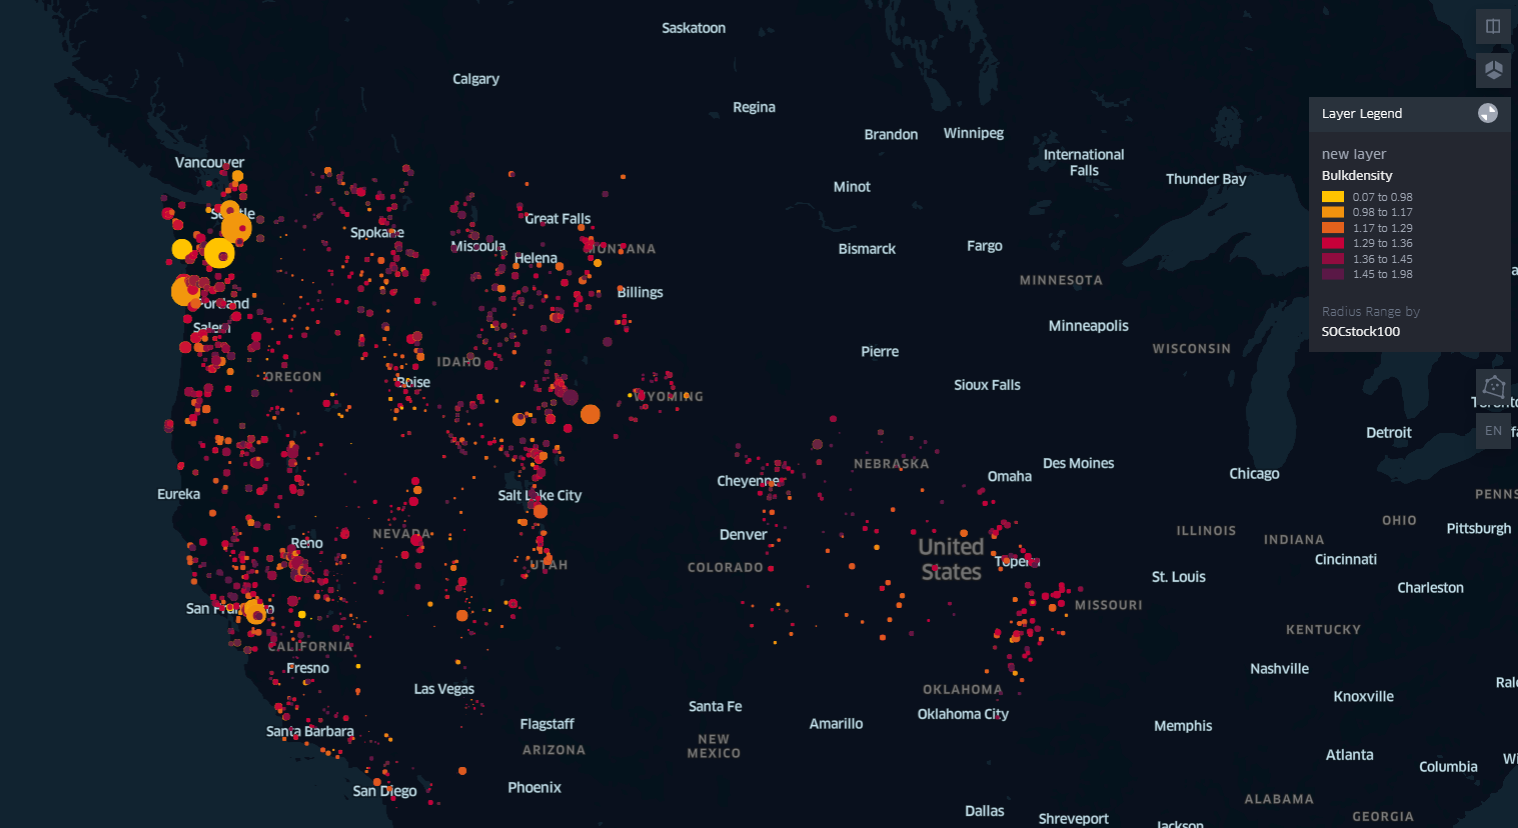

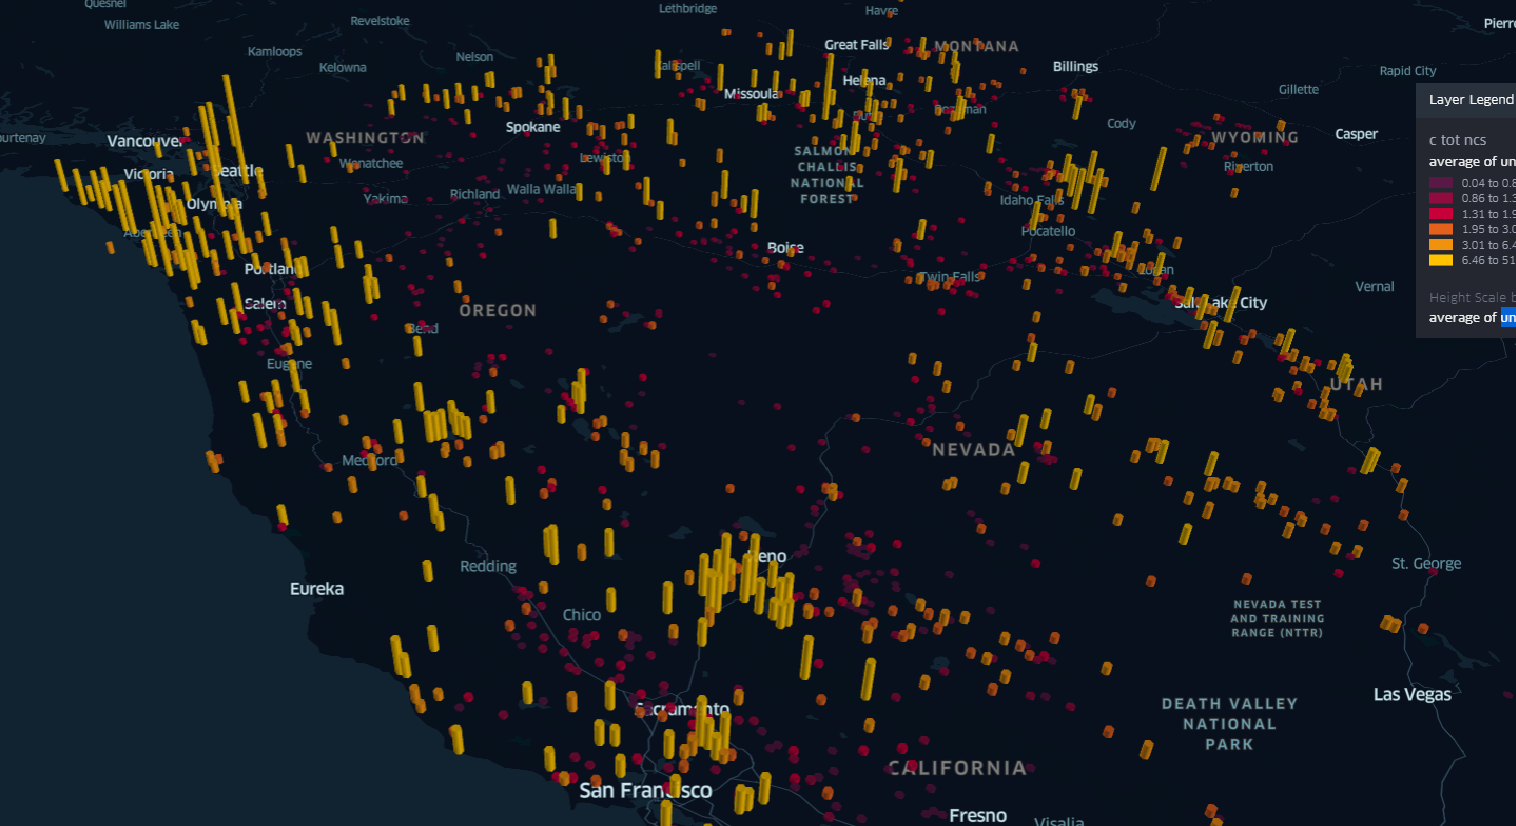

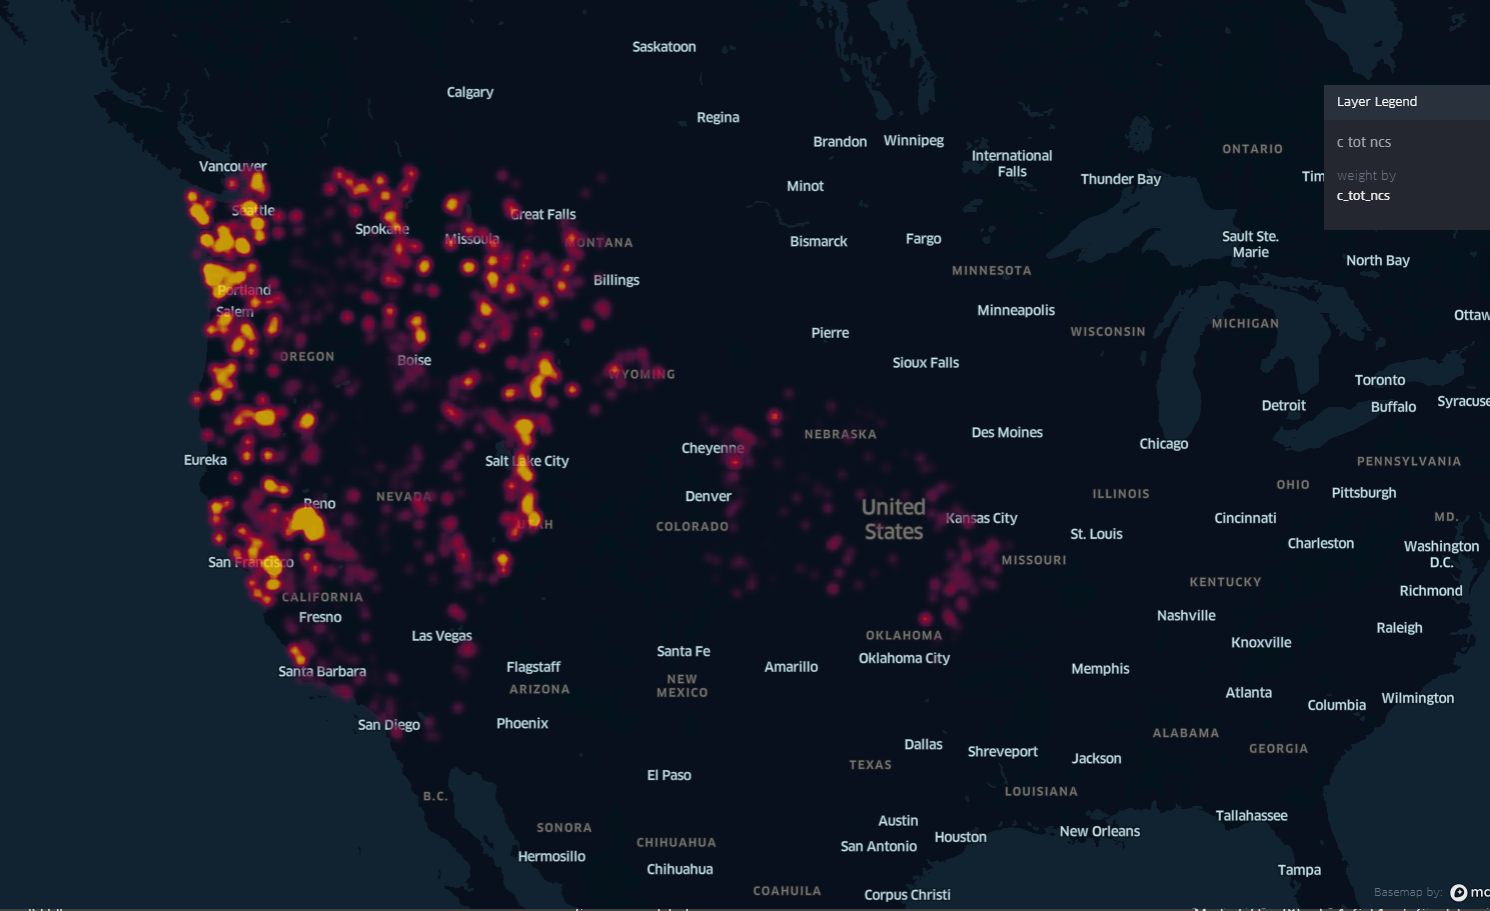

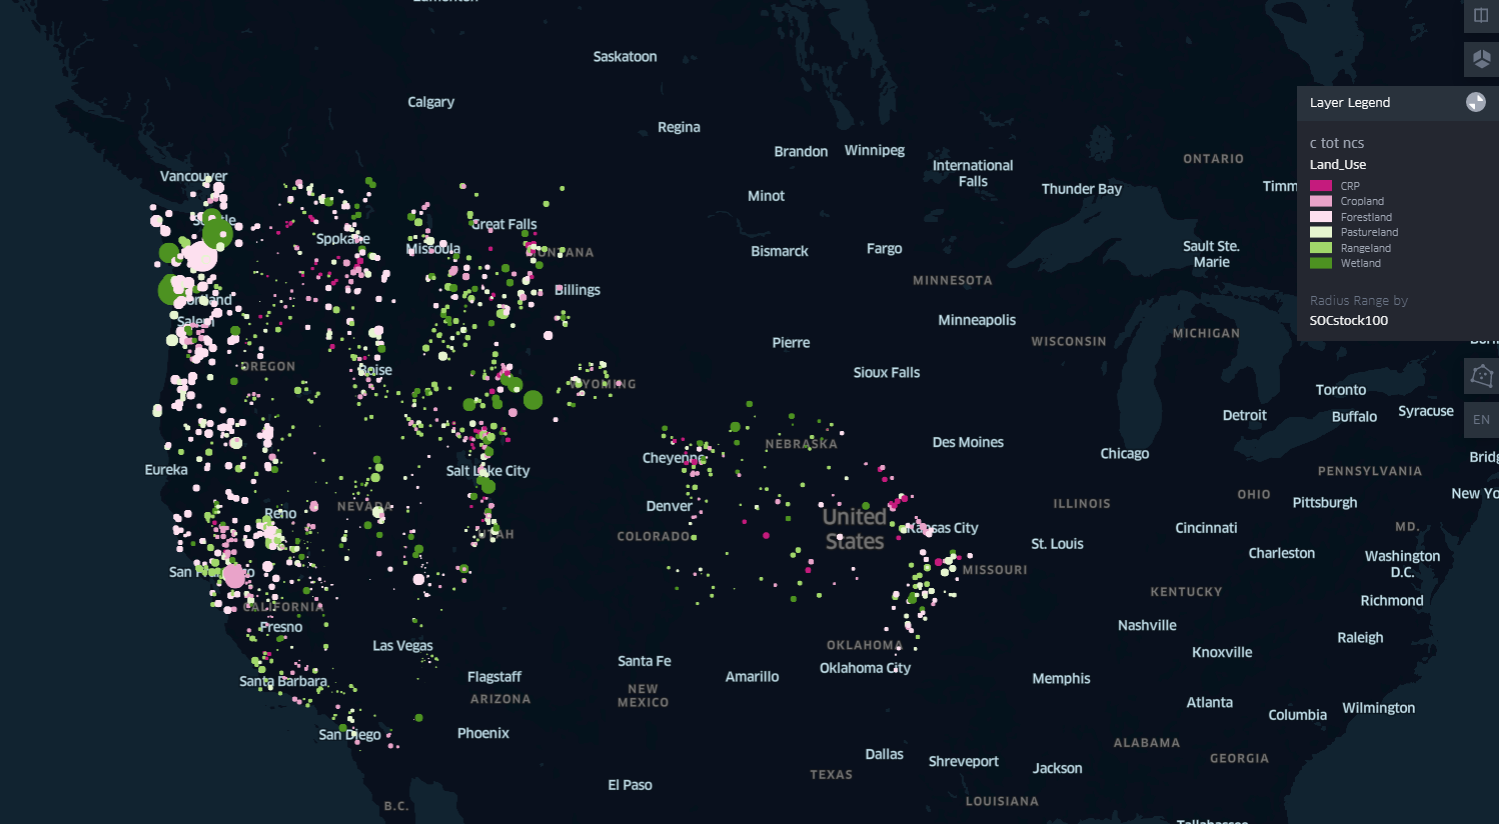